# dependencies

In [1]:
import sys
sys.path.insert(0, '../')  # Adjust the path as necessary
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

2024-02-17 18:05:04.375285: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **Model Inputs**

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-30
[1.1e-08 1e-11 1e-11 1e-11 0.99999998897] sum to:  1.0
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 7.8192663840605832, performing 132.7 it/sec
Step 100: Loss = 0.5303983013156701, performing 1458.3 it/sec
Step 200: Loss = 0.3057209295365516, performing 1653.6 it/sec
Step 300: Loss = 0.1196536265500237, performing 1871.2 it/sec
Step 400: Loss = 0.0071180126056176, performing 1826.2 it/sec
No improvement since Step 382, early stopping.
[Best]  Step 381: Loss = 0.0047381249942000
[Final] Step 431: Loss = 0.0074824494176427

predicted end states
------------------------------------
         5th       Mean      95th
LCDL-1  1.09e-08  1.11e-08  1.13e-08
LCDL-2  1.01e-11  1.02e-11  1.05e-11
LCDL-3  9.97e-12  1.01e-11  1.03e-11
LCDL-4  9.94e-12  1.01e-11  1.03e-11
LCDL-0  1.00e+00  1.00e+00  1.00e+00


predicted conditional events
----------------------------------
       5th       

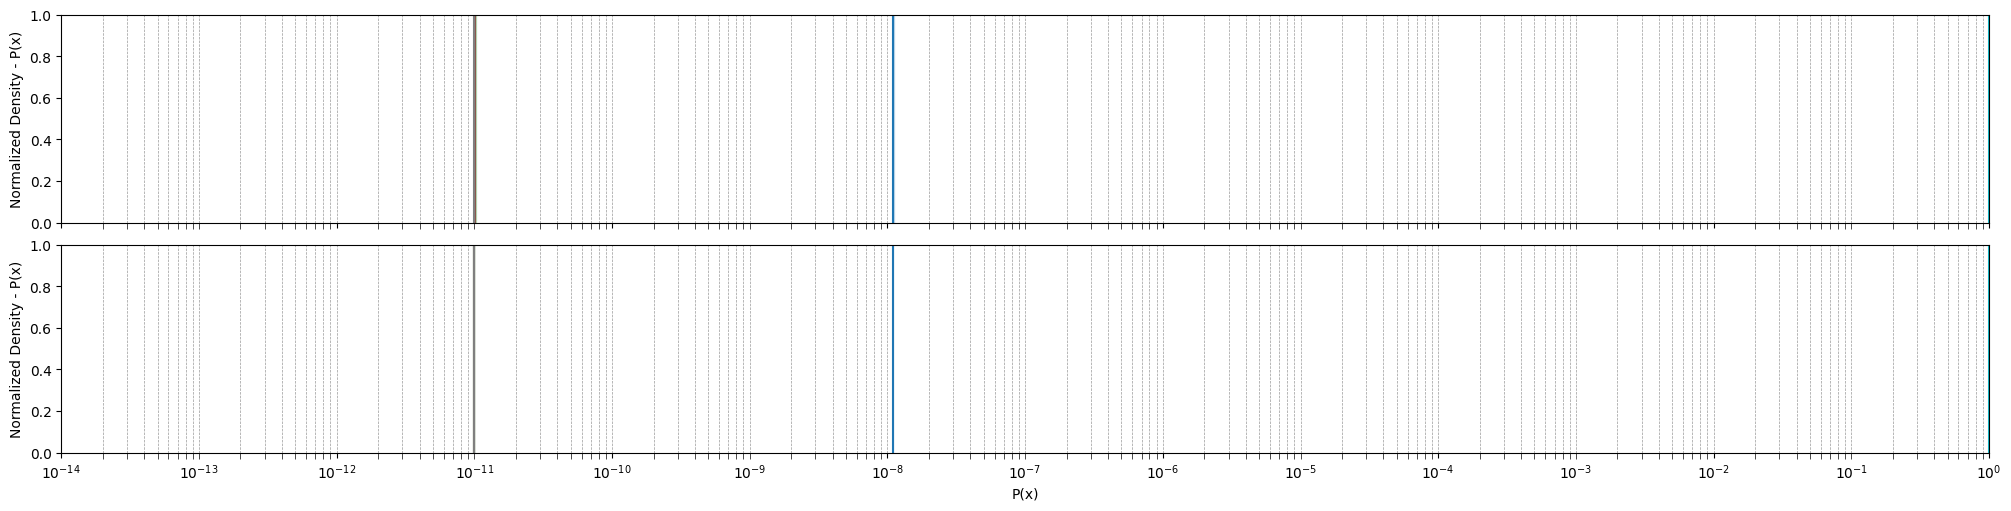

In [9]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable = {
 'num_samples': 10,    # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-30,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve   
}

conditional_events = {
    'names': ['LCDL', 'PKRU', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LCDL-1': {
        'sequence': [1, 0, 0, 0],
        'probability': 1.1e-8,
    },
    'LCDL-2': {
        'sequence': [1, 0, 0, 1],
        'probability': 1.00e-11,
    },
    'LCDL-3': {
        'sequence': [1, 0, 1, np.nan],
        'probability': 1.00e-11,
    },
    'LCDL-4': {
        'sequence': [1, 1, np.nan, np.nan],
        'probability': 1.00e-11,
    },
    'LCDL-0': {
        'sequence': [0, np.nan, np.nan, np.nan],
        'probability': 1.0 - 1.1e-8 - 1.00e-11 - 1.00e-11 - 1.00e-11, # one minus all the other end-states
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-30
[995.71587289999991 4.1999999999999993 0.041999999999999996 ... 0.0021 1.7e-05 4.2999999999999995e-06] sum to:  999.9999999999999
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 20.9157354171967427, performing 190.9 it/sec
Step 100: Loss = 7.3379871713853220, performing 1195.6 it/sec
No improvement since Step 147, early stopping.
[Best]  Step 146: Loss = 2.5065113541724227
[Final] Step 196: Loss = 4.5656432356453740

predicted end states
------------------------------------
         5th       Mean      95th
SDFR-0  0.00e+00  0.00e+00  0.00e+00
SDFR-1  9.28e-04  9.28e-04  9.28e-04
SDFR-2  2.05e-05  2.05e-05  2.05e-05
SDFR-3  9.43e-09  9.43e-09  9.43e-09
SDFR-4  2.16e-05  2.16e-05  2.16e-05
SDFR-5  2.83e-05  2.83e-05  2.83e-05
SDFR-6  1.59e-06  1.59e-06  1.59e-06
SDFR-7  5.87e-08  5.87e-08  5.87e-08
SDFR-8  1.48e-08  1.48e-08  1.48e-08


predicted conditional events
--------------

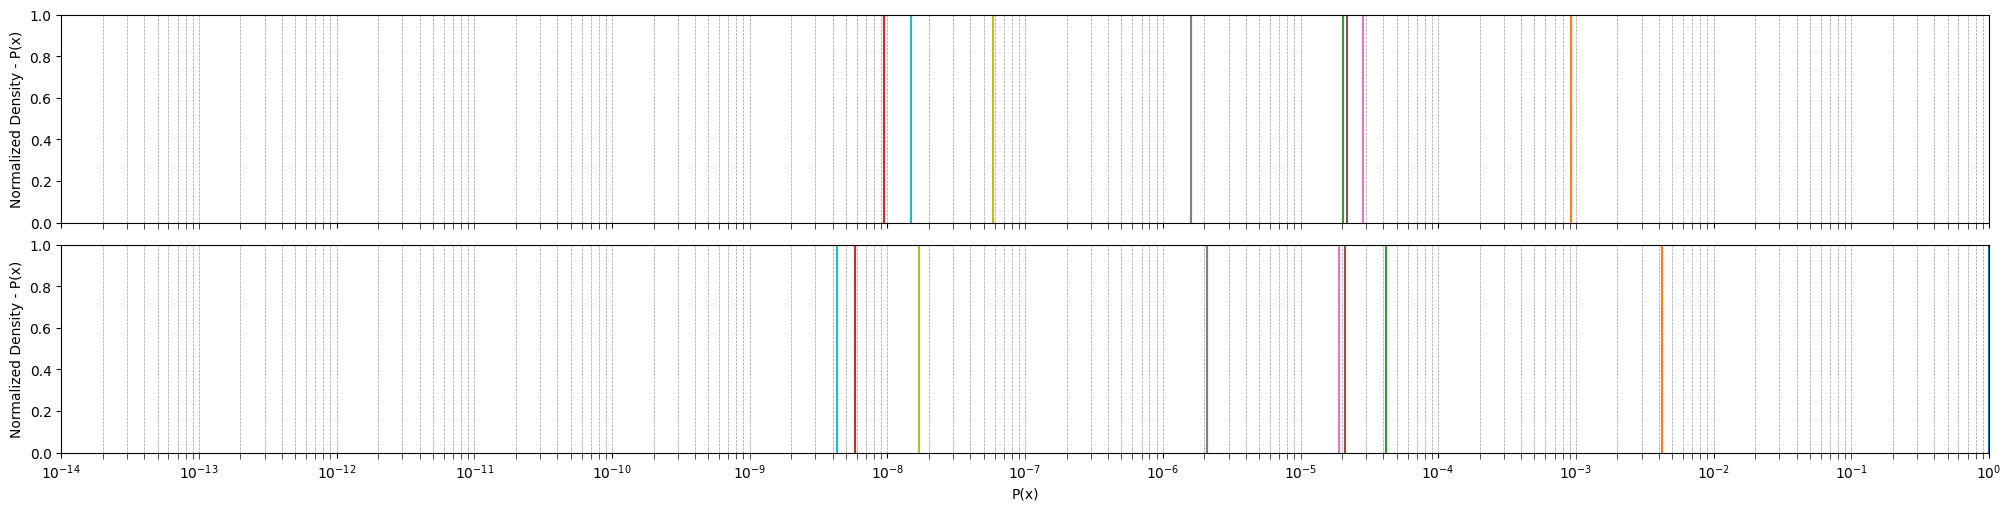

In [7]:
tunable = {
 'num_samples': 100,     # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-30,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before stopping, if the loss does not improve
}

conditional_events = {
    'names': ['SDFR      ', 'LMFD      ', 'RFIR      ', 'LLRF      ', 'SSSD|~LLRF', 'SSSD|LLRF ', 'SYSO|~LLRF', 'SYSO|LLRF '],  # Assuming names based on the sequences
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'SDFR-0': {
        'sequence': [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1 - 4.2e-3 - 4.2e-5 - 5.8e-9 - 2.1e-5 - 1.9e-5 - 2.1e-6 - 1.7e-8 - 4.3e-9,
    },
    'SDFR-1': {
        'sequence': [1, 0, 0, 0, 0, np.nan, np.nan, np.nan],
        'probability': 4.2e-3,
    },
    'SDFR-2': {
        'sequence': [1, 0, 0, 0, 1, np.nan, 0, np.nan]  ,
        'probability': 4.2e-5,
    },
    'SDFR-3': {
        'sequence': [1, 0, 0, 0, 1, np.nan, 1, np.nan],
        'probability': 5.8e-9,
    },
    'SDFR-4': {
        'sequence': [1, 0, 0, 1, np.nan, 0, np.nan, np.nan],
        'probability': 2.1e-5,
    },
    'SDFR-5': {
        'sequence': [1, 0, 0, 1, np.nan, 1, np.nan, 0],
        'probability': 1.9e-5,
    },
    'SDFR-6': {
        'sequence': [1, 0, 0, 1, np.nan, 1, np.nan, 1],
        'probability': 2.1e-6,
    },
    'SDFR-7': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.7e-8,  
    },
    'SDFR-8': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.3e-9,  
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)